# Clickstream Project: Machine Learning Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---

## 🧠 Insight-First Analytical Framework

### 1️⃣ Behavioral Diagnosis

Identify high-intent vs low-intent browsing patterns

Translate clusters into retail personas (“Price-Sensitive Browser”, “Decisive Buyer”)

### 2️⃣ Business Experiments (Simulated A/B Thinking)

Image placement → engagement lift

Price bands → conversion elasticity

Category prominence → dwell impact

(This screams “Research Decision Science.”)

### 3️⃣ Recommendation Engine

Not predictions — playbooks:

“Move X categories higher on page → expected uplift”

“Re-price mid-tier products → reduce abandonment”

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/model_ready_clickstream_data.csv')

df.drop(columns = 'Unnamed: 0', inplace = True)

# Fixing an Issue of Inappropriate Data Types still Popping up
df['year'] = df['year'].astype('object')
df['price 2'] = df['price 2'].astype('object') # Binary variable: is the Price of the Product higher than the Average Price for the entire Product Category

df.head(5)

Mounted at /content/drive


,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,price category,week,month phase
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,Cheap,First Week,A
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,Cheap,First Week,A
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,High,First Week,A
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,Affordable,First Week,A
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,High,First Week,A


In [ ]:
# Feature Engineering through Market Psychology
# Assuming there is an 80% Chance of Someone buying the Item if he/she is interested enough to Click on it once

df['expected revenue'] = ((df['price'] * df['order'])*0.80).astype(float).round(2)

# Creating a Unique "Transaction ID" for each Potential Purchase

df['transaction_id'] = (
    df['order'].astype(str) +
    df['session ID'].astype(str) +
    df['colour'].astype(str) +
    df['location'].astype(str) +
    '-' +
    df['year'].astype(str) +
    '-' +
    df['month'].astype(str).str.zfill(2) +
    '-' +
    df['day'].astype(str).str.zfill(2)).astype('object')

df.sample(7)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,price category,week,month phase,expected revenue,transaction_id
76924,2008,5,25,5,46,11092,2,B13,12,5,2,62,1,1,Expensive,Fourth Week,A,248.0,511092125-2008-05-25
7583,2008,4,3,36,29,1101,2,B16,12,6,1,52,1,1,High,First Week,A,1497.6,361101126-2008-04-03
152117,2008,8,1,4,29,22210,1,A12,2,4,1,38,2,1,Affordable,First Week,B,121.6,42221024-2008-08-01
160351,2008,8,8,1,9,23339,1,A18,4,6,1,38,2,1,Affordable,Second Week,B,30.4,12333946-2008-08-08
74849,2008,5,24,7,29,10817,3,C41,13,2,1,28,2,3,Cheap,Fourth Week,A,156.8,710817132-2008-05-24
82906,2008,5,30,1,29,12002,2,B1,4,1,1,57,1,1,High,Last Week,A,45.6,11200241-2008-05-30
89312,2008,6,5,3,29,13031,2,B23,7,2,1,38,2,2,Affordable,First Week,A,91.2,31303172-2008-06-05


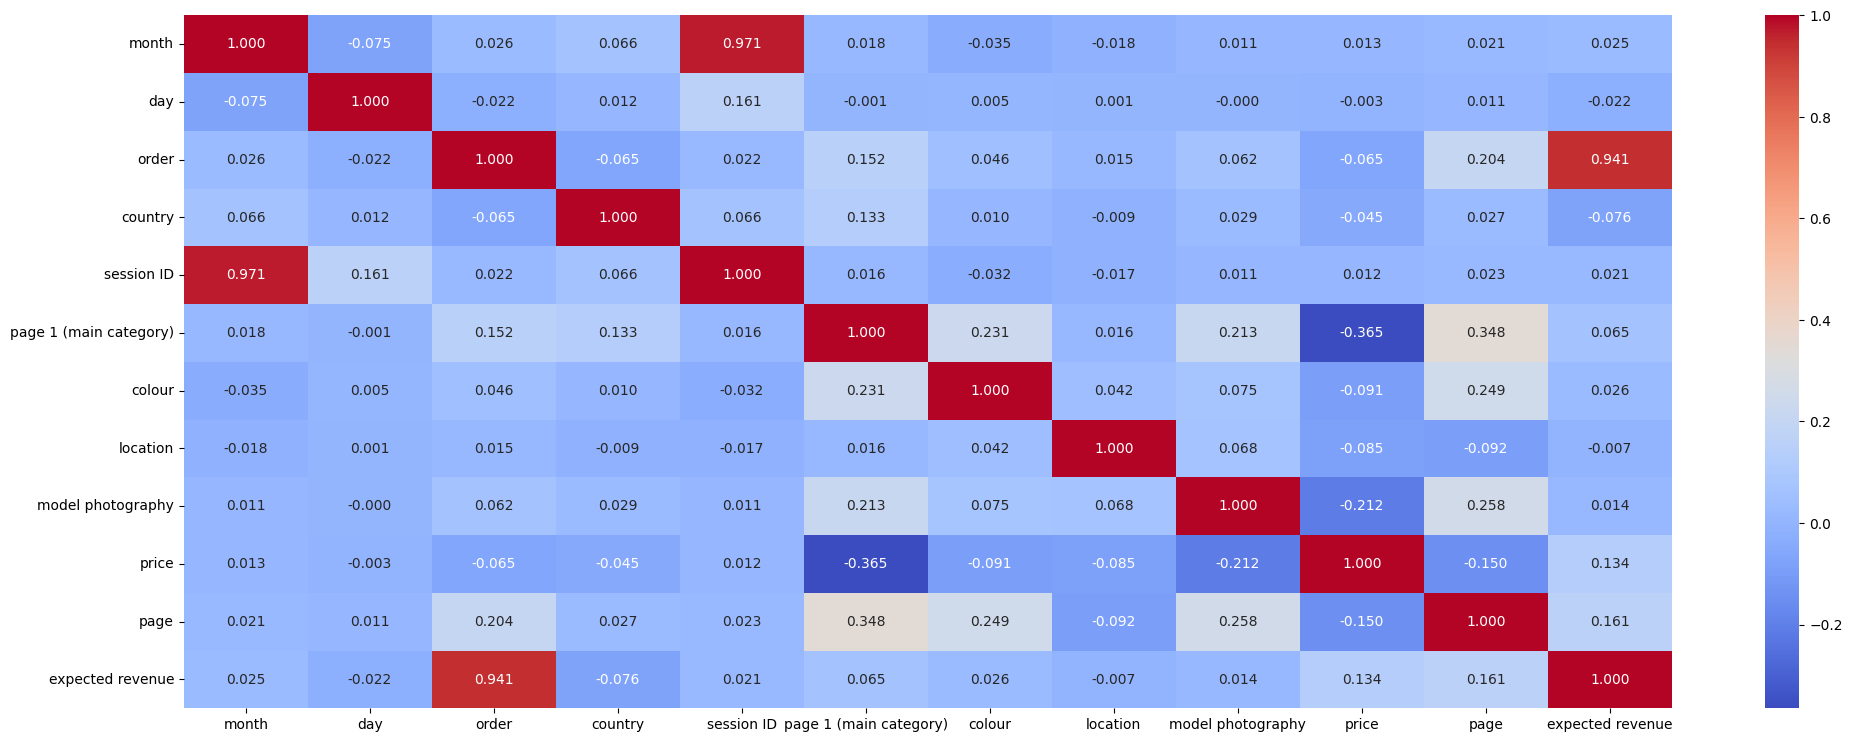

In [ ]:
# Crucial: Let's Review the Correlation between all Numerical variables

plt.style.use('default')
plt.figure(figsize = (24, 9))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = '.3f', cmap = 'coolwarm')
plt.show()

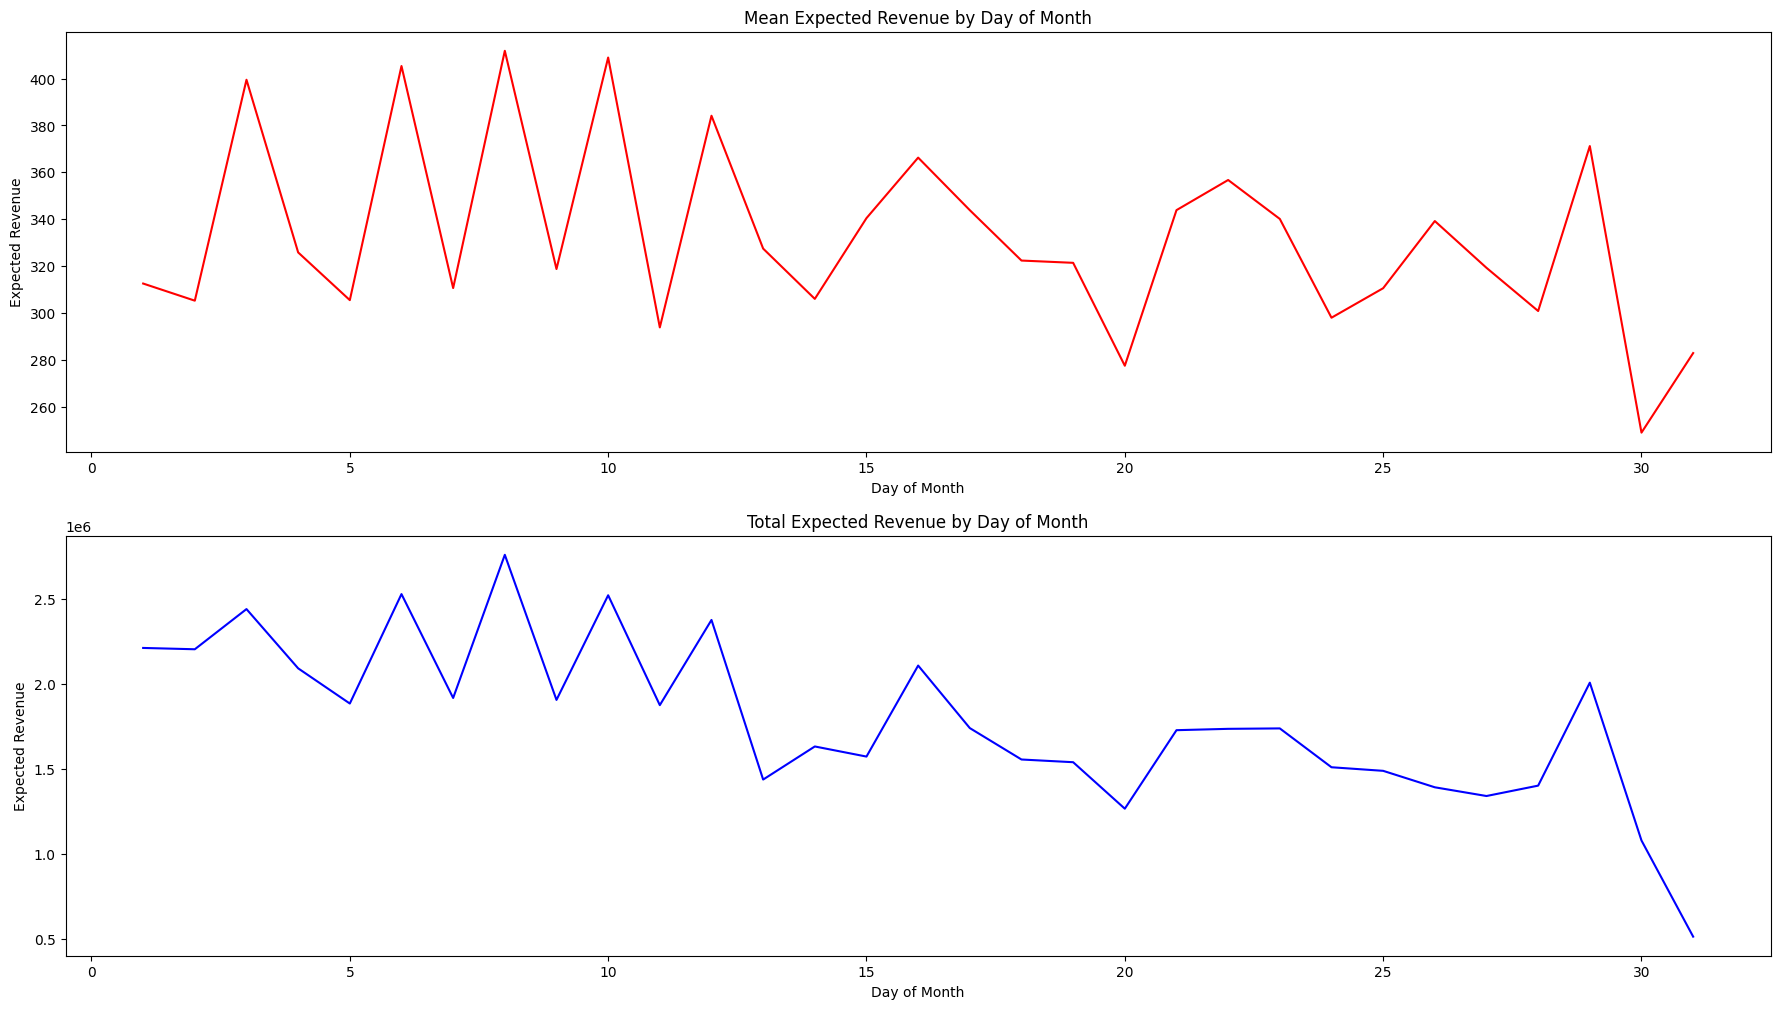

In [ ]:
plt.figure(figsize = (22, 12))

plt.subplot(2, 1, 1)
sns.lineplot(x = df.groupby('day')['expected revenue'].mean().index, y = df.groupby('day')['expected revenue'].mean().values,
             color = 'red')
plt.title("Mean Expected Revenue by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Expected Revenue")

plt.subplot(2, 1, 2)
sns.lineplot(x = df.groupby('day')['expected revenue'].sum().index, y = df.groupby('day')['expected revenue'].sum().values,
             color = 'blue')
plt.title("Total Expected Revenue by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Expected Revenue")

plt.show()

# **Logistic Regression Model:**

---

**Plan:**

* Define Target Variable: Apply np.log() to the 'order' column to transform its distribution. Then, create a binary target variable, high_engagement_click, by setting a threshold (e.g., the median of the log-transformed 'order' values) to distinguish between low and high engagement clicks. This will serve as the target for the Logistic Regression model.

* Split Data: Divide the preprocessed feature matrix X_preprocessed and the newly created binary target variable high_engagement_click into training and testing sets (e.g., 80% training, 20% testing) to prepare for model building and evaluation.

* Train Logistic Regression Model: Instantiate and train a Logistic Regression model using the training data. Ensure appropriate parameters are set (e.g., solver, random_state).

* Evaluate Model Performance: Calculate and display standard classification metrics on the test set, such as accuracy, precision, recall, F1-score, and the confusion matrix, to assess the Logistic Regression model's performance in predicting high engagement clicks.

* Analyze Feature Importance: Extract and interpret the coefficients of the trained Logistic Regression model. These coefficients indicate the relative importance and direction of influence of each feature on the likelihood of a high engagement click, which is crucial for decision science insights.

* Visualize ROC Curve: Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) for the Logistic Regression model on the test set. This visualization helps to understand the trade-off between the true positive rate and false positive rate at various threshold settings.

* Final Task: Summarize the key findings from the Logistic Regression model, including insights from feature importance, overall model performance, and their implications for H-E-B's business strategies related to ad click-through rates. Present these findings in a way that highlights your analytical and decision-making skills.

---

## Defining the Target Variable

* Applying `np.log()` to the 'order' column to transform/try to Unskew its distribution.

* Then, Creating a Binary Target variable, `high_engagement_click`, by setting a threshold (the mean of the standardized log-transformed 'order' values, which will be 0) to distinguish between Low and High engagement clicks - these will be the basis for Measuring Ad Clickthrough Rate and will serve as the Target for the Logistic Regression model.

In [ ]:
# Ad Clickthrough Rate

from sklearn.preprocessing import StandardScaler

# 1. Applying "np.log()" to the 'order' column

df['log_order'] = np.log(df['order'])

# 2. Standardizing the Log-Transformed 'order'

scaler = StandardScaler()
df['standardized_log_order'] = scaler.fit_transform(df[['log_order']])

# 3. Creating the Binary Target variable "high_engagement_click"
## Using the Median as the Cutoff, as it's more Resistant to Outliers compared to the Mean

df['ad_clickthrough'] = ((df['standardized_log_order'] > df['standardized_log_order'].median()).astype(int)) # 1 = yes, 0 = no

print("Target variable 'ad_clickthrough' created successfully.")
print("Distribution of 'ad_clickthrough':")
print(df['ad_clickthrough'].value_counts())
print("\nFirst 5 rows with new target variable:")
print(df[['order', 'log_order', 'ad_clickthrough']].head())

Target variable 'ad_clickthrough' created successfully.
Distribution of 'ad_clickthrough':
ad_clickthrough
0    92135
1    73339
Name: count, dtype: int64

First 5 rows with new target variable:
   order  log_order  ad_clickthrough
0      1   0.000000                0
1      2   0.693147                0
2      3   1.098612                0
3      4   1.386294                0
4      5   1.609438                0


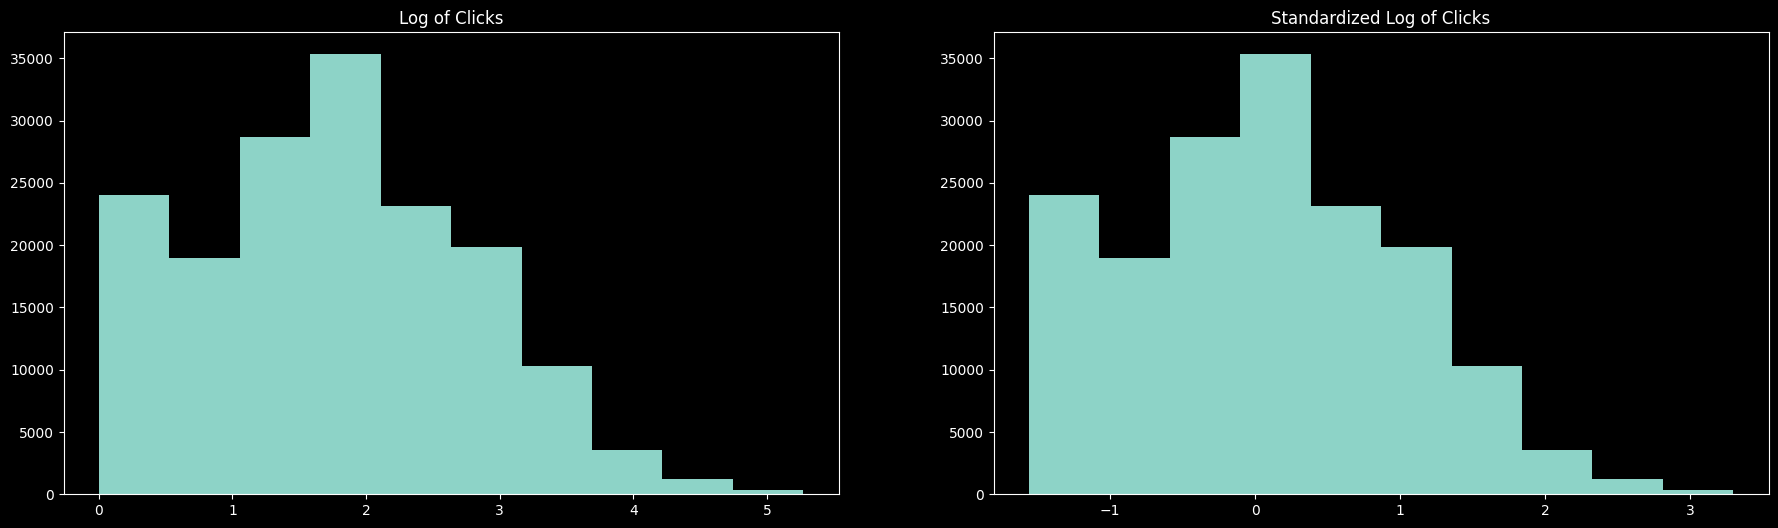


Mean of Click Count: 9.8175
Mean of Logarithmized Click Count: 1.694
Mean of Standardized and Logarithmized Click Count: 2.3e-16


In [ ]:
plt.style.use('dark_background')

plt.figure(figsize = (22, 6))

plt.subplot(1, 2, 1)
plt.hist(df['log_order'])
plt.title('Log of Clicks')

plt.subplot(1, 2, 2)
plt.hist(df['standardized_log_order'])
plt.title('Standardized Log of Clicks')

plt.show()

print('\nMean of Click Count:', df['order'].mean().round(4))
print('Mean of Logarithmized Click Count:', df['log_order'].mean().round(3))
print('Mean of Standardized and Logarithmized Click Count:', df['standardized_log_order'].mean().round(17))

### Logistic Regression:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Defining Transformers for Numerical and Categorical columns

numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

# Identifying Columns to drop from the Feature Set to prevent Data Leakage and exclude the Target variable

leakage_columns = ['order', 'log_order', 'expected revenue', 'standardized_log_order']

# Combine all columns that should be excluded from the feature set X
# Now, only leakage columns, the target variable, and 'transaction_id' are excluded

columns_to_exclude_from_X = list(set(leakage_columns + ['ad_clickthrough', 'transaction_id']))

# Preparing the Feature Matrix X by Dropping all identified columns

X = df.drop(columns = columns_to_exclude_from_X)

# Defining the Target variable "y"

y = df['ad_clickthrough']

# Update numerical_columns and categorical_columns based on the new X

numerical_columns = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include = ['object']).columns.tolist()

# The preprocessor is updated to handle both numerical and categorical columns

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder = 'passthrough'
)

# Creating a Pipeline with the Preprocessor

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor)
])

# Applying the Pipeline to the Dataset

X_preprocessed = pipeline.fit_transform(X)

print(f"Shape of X_preprocessed: {X_preprocessed.shape}")
print(f"Features included in X: {X.columns.tolist()}")
print(f"Numerical columns used in preprocessing: {numerical_columns}")
print(f"Categorical columns used in preprocessing: {categorical_columns}")

Shape of X_preprocessed: (165474, 242)
Features included in X: ['year', 'month', 'day', 'country', 'session ID', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price', 'price 2', 'page', 'price category', 'week', 'month phase']
Numerical columns used in preprocessing: ['month', 'day', 'country', 'session ID', 'page 1 (main category)', 'colour', 'location', 'model photography', 'price', 'page']
Categorical columns used in preprocessing: ['year', 'page 2 (clothing model)', 'price 2', 'price category', 'week', 'month phase']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Logistic Regression with Default Parameters

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.2, random_state = 4)

logr = LogisticRegression()
logr_scores = cross_val_score(logr, X_train, y_train, cv = 5, scoring = 'accuracy')
print(logr_scores*100)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[63.18930352 63.29883668 63.06466234 62.90980511 62.94239849]


In [ ]:
# Parameter Grid for RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

grid_search_logr = RandomizedSearchCV(logr, param_grid, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 1) # Could have also used GridSearchCV
grid_search_logr.fit(X_train, y_train)
test_score_logr = grid_search_logr.best_estimator_.score(X_train, y_train)

print(f"Best Penalty Value: {grid_search_logr.best_params_['penalty']*100}")
print(f"Best C Value: {grid_search_logr.best_params_['C']*100}")
print(f"Best Solver Value: {grid_search_logr.best_params_['solver']*100}")
print(f"Best Max Iterations: {grid_search_logr.best_params_['max_iter']*100}")
print(f"Best Accuracy: {grid_search_logr.best_score_*100}")

print("")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix

grid_search_logr.fit(X_train, y_train)

y_pred = grid_search_logr.predict(X_test)

print(f"Accuracy of the Logistic Regression Model:", accuracy_score(y_test, y_pred)*100)
print(f"Precision of the Logistic Regression Model:", precision_score(y_test, y_pred)*100)
print(f"Recall of the Logistic Regression Model:", recall_score(y_test, y_pred)*100)
print(f"F-1 Score of the Logistic Regression Model:", f1_score(y_test, y_pred)*100)
print(f"Confusion Matrix of the Logistic Regression Model:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Penalty Value: l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1
Best C Value: 10.0
Best Solver Value: sagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasagasaga
Best Max Iterations: 20000
Best Accuracy: 63.099131138918054

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy of the Logistic Regression Model: 62.79196253210455
Precision of the Logistic Regression Model: 60.75539568345324
Recall of the Logistic Regression

---

# **K-Means Clustering:**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Identifying the Optimum Number of Clusters - Elbow Plot & Silhouette Score, both

def optimize_k_means(data, max_k):
  means = []
  inertias = []
  silhouette_scores = []

  # Elbow Plot calculation loop
  for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 10, n_init=10)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

  # Silhouette Score calculation loop (Silhouette score is not defined for k=1)
  for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 10, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    score = silhouette_score(data, cluster_labels)
    silhouette_scores.append(score)

  # Generating the Elbow Plot (moved outside loop)
  plt.style.use('default')
  plt.figure(figsize = (10, 5))
  plt.plot(means, inertias, 'o--')
  plt.xlabel('Number of Clusters (k)')
  plt.xticks(means)
  plt.ylabel('Inertia')
  plt.title('Elbow Plot')
  plt.grid(True)
  plt.show()

  # Plotting the Silhouette Score (moved outside loop)
  plt.figure(figsize = (10, 5))
  plt.plot(range(2, max_k + 1), silhouette_scores, marker = 'o')
  plt.title('Silhouette Score for K-Means Clustering')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.grid(True)
  plt.show()

In [ ]:
optimize_k_means(df[['expected revenue', 'standardized_log_order']], 9)

# Verdict (Based on Elbow Plot & Silhouette Score):
## 3 Seems to be the Optimal Cluster Amount 'k'

In [ ]:
# Applying K-Means Clustering

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df[['expected revenue', 'standardized_log_order']])

KMeans(n_clusters=3)

In [ ]:
df['kmeans_cluster'] = kmeans.labels_ + 1

df.sample(7)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,...,page,price category,week,month phase,expected revenue,transaction_id,log_order,standardized_log_order,ad_clickthrough,kmeans_cluster
563,2008,4,1,5,29,88,3,C6,6,2,...,1,Cheap,First Week,A,132.0,58862-2008-04-01,1.609438,-0.078353,0,1
33840,2008,4,20,7,29,4816,1,A4,3,2,...,1,Affordable,Third Week,A,212.8,7481632-2008-04-20,1.945910,0.231675,1,1
26753,2008,4,15,1,29,3892,2,B21,12,1,...,2,Expensive,Third Week,A,53.6,13892121-2008-04-15,0.000000,-1.561303,0,1
45763,2008,4,29,44,9,6571,3,C10,9,4,...,1,Cheap,Last Week,A,985.6,44657194-2008-04-29,3.784190,1.925482,1,2
150629,2008,7,31,5,44,22004,3,C4,4,2,...,1,High,Last Week,B,192.0,52200442-2008-07-31,1.609438,-0.078353,0,1
163531,2008,8,11,11,29,23766,1,A9,3,3,...,1,Expensive,Second Week,B,721.6,112376633-2008-08-11,2.397895,0.648139,1,2
29722,2008,4,17,3,29,4310,2,B4,10,2,...,1,High,Third Week,A,124.8,34310102-2008-04-17,1.098612,-0.549032,0,1


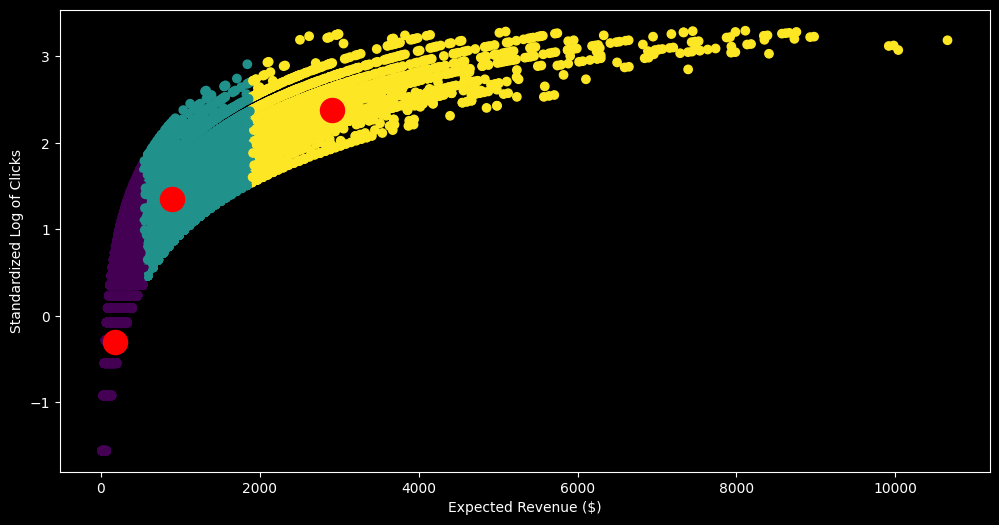

In [ ]:
# Plotting the Results

centroids1 = kmeans.cluster_centers_

plt.style.use('default')
plt.figure(figsize = (12, 6))
plt.scatter(x = df['expected revenue'], y = df['standardized_log_order'], c = df['kmeans_cluster'])
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', marker = 'o', label = 'Centroids') # Plotting the Centroids too
plt.xlabel("Expected Revenue ($)")
plt.ylabel("Standardized Log of Clicks")
plt.show()

In [ ]:
# Comparing Results from Multiple Clusters

for k in range(1, 6):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df[['expected revenue', 'standardized_log_order']])
  df[f"K-Means_{k}"] = kmeans.labels_

df.sample(7)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,...,transaction_id,log_order,standardized_log_order,ad_clickthrough,kmeans_cluster,K-Means_1,K-Means_2,K-Means_3,K-Means_4,K-Means_5
11949,2008,4,6,14,29,1721,1,A9,3,3,...,14172133-2008-04-06,2.639057,0.870347,1,2,0,1,2,2,3
50303,2008,5,3,6,9,7227,1,A12,2,4,...,6722724-2008-05-03,1.791759,0.089640,0,1,0,0,0,0,2
132038,2008,7,15,11,29,19373,3,C48,6,4,...,111937364-2008-07-15,2.397895,0.648139,1,1,0,0,0,0,2
32869,2008,4,19,28,29,4695,1,A33,1,5,...,28469515-2008-04-19,3.332205,1.509019,1,2,0,0,2,2,3
86629,2008,6,3,1,29,12619,1,A2,3,1,...,11261931-2008-06-03,0.000000,-1.561303,0,1,0,0,0,0,2
152998,2008,8,2,4,29,22349,3,C7,13,3,...,422349133-2008-08-02,1.386294,-0.283959,0,1,0,0,0,0,2
6963,2008,4,3,1,29,1017,1,A2,3,1,...,1101731-2008-04-03,0.000000,-1.561303,0,1,0,0,0,0,2


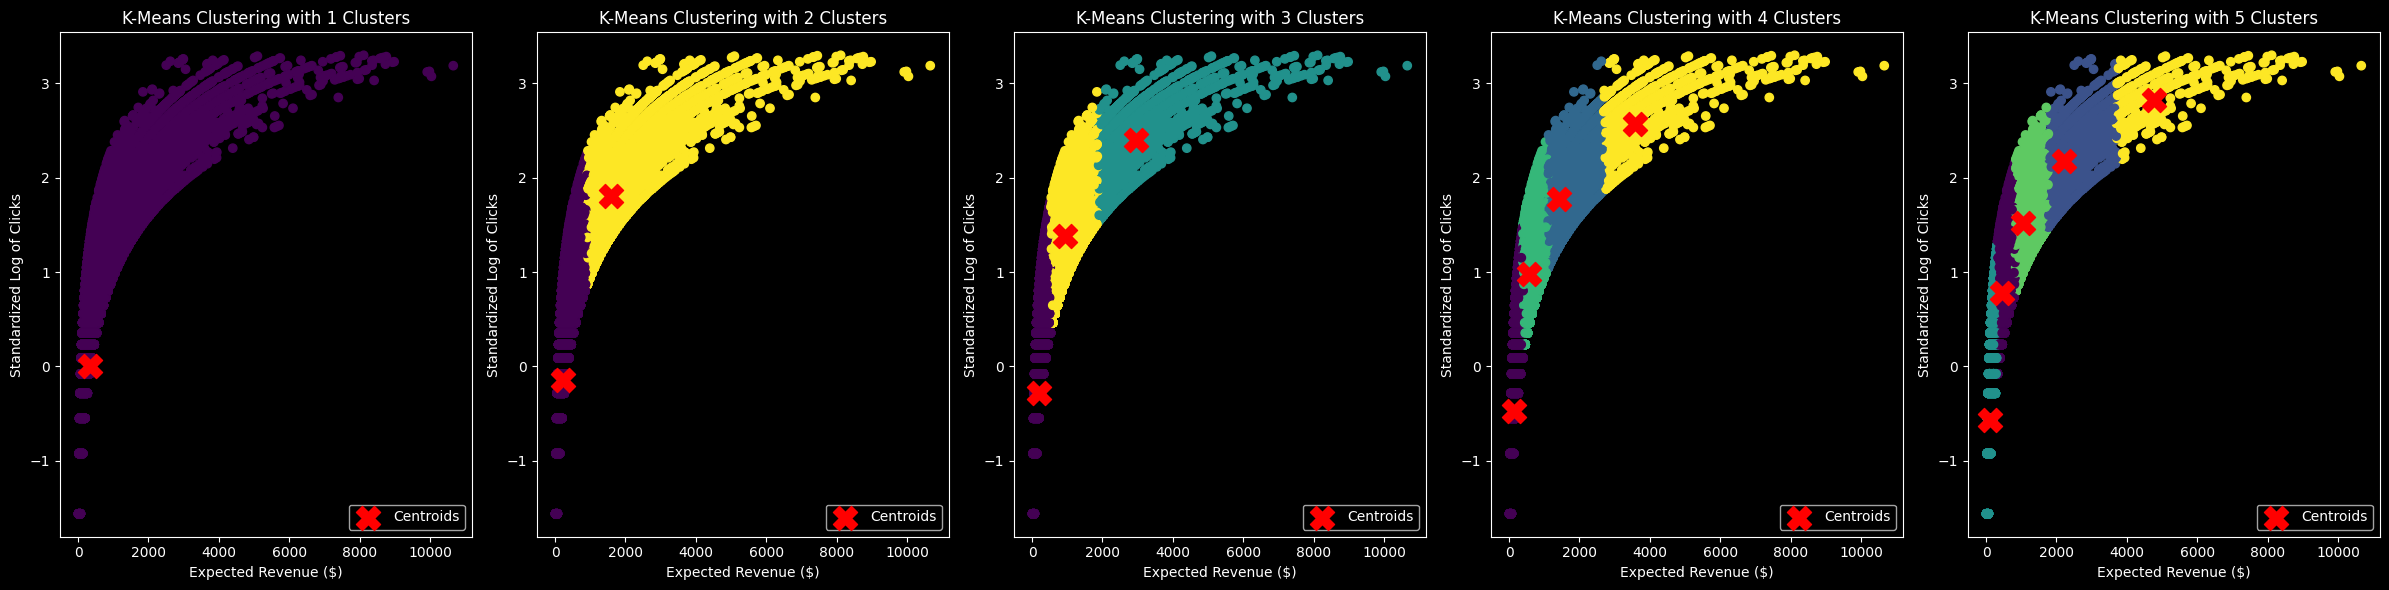

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (24, 6))

for i, ax in enumerate(fig.axes, start = 1):
  kmeans = KMeans(n_clusters = i, random_state = 10)
  kmeans.fit(df[['expected revenue', 'standardized_log_order']])
  centroids = kmeans.cluster_centers_

  ax.scatter(x = df['expected revenue'], y = df['standardized_log_order'], c = df[f"K-Means_{i}"])
  ax.scatter(x = centroids[:, 0], y = centroids[:, 1], s = 300, c = 'red', marker = 'X', label = 'Centroids') # Plotting the Centroids too
  ax.set_title(f"K-Means Clustering with {i} Clusters")
  ax.set_xlabel("Expected Revenue ($)")
  ax.set_ylabel("Standardized Log of Clicks")
  ax.legend()

plt.tight_layout()
plt.show()